In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("assignment4.ipynb")

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Assignment-4:-Modeling-and-Optimization" data-toc-modified-id="Assignment-4:-Modeling-and-Optimization-1">Assignment 4: Modeling and Optimization</a></span></li><li><span><a href="#Questions-1-3:-Resource-Allocation-Problem" data-toc-modified-id="Questions-1-3:-Resource-Allocation-Problem-2">Questions 1-3: Resource Allocation Problem</a></span><ul class="toc-item"><li><span><a href="#Question-1:-Resource-Constraints" data-toc-modified-id="Question-1:-Resource-Constraints-2.1">Question 1: Resource Constraints</a></span><ul class="toc-item"><li><span><a href="#Question-1.a:-Modeling-Resource-Usage" data-toc-modified-id="Question-1.a:-Modeling-Resource-Usage-2.1.1">Question 1.a: Modeling Resource Usage</a></span></li><li><span><a href="#Question-1.b:--Resource-Usage-vs.-Total-Resource-Constraint" data-toc-modified-id="Question-1.b:--Resource-Usage-vs.-Total-Resource-Constraint-2.1.2">Question 1.b:  Resource Usage vs. Total Resource Constraint</a></span></li><li><span><a href="#Question-1.c:-Feasible-Region-Boundary" data-toc-modified-id="Question-1.c:-Feasible-Region-Boundary-2.1.3">Question 1.c: Feasible Region Boundary</a></span></li><li><span><a href="#Question-1.d:-Interior-of-Feasible-Region" data-toc-modified-id="Question-1.d:-Interior-of-Feasible-Region-2.1.4">Question 1.d: Interior of Feasible Region</a></span></li><li><span><a href="#Question-1.e:-Visualizing-the-Feasible-Region" data-toc-modified-id="Question-1.e:-Visualizing-the-Feasible-Region-2.1.5">Question 1.e: Visualizing the Feasible Region</a></span></li></ul></li><li><span><a href="#Question-2:-Objective-Function" data-toc-modified-id="Question-2:-Objective-Function-2.2">Question 2: Objective Function</a></span><ul class="toc-item"><li><span><a href="#Question-2.a:-Defining-Objective-Function" data-toc-modified-id="Question-2.a:-Defining-Objective-Function-2.2.1">Question 2.a: Defining Objective Function</a></span></li><li><span><a href="#Question-2.b:-Direction-of-Steepest-Increase" data-toc-modified-id="Question-2.b:-Direction-of-Steepest-Increase-2.2.2">Question 2.b: Direction of Steepest Increase</a></span></li></ul></li><li><span><a href="#Question-3:-Putting-Pieces-Together" data-toc-modified-id="Question-3:-Putting-Pieces-Together-2.3">Question 3: Putting Pieces Together</a></span><ul class="toc-item"><li><span><a href="#Question-3.a:-Standard-Form-of-a-Linear-Programming-Problem" data-toc-modified-id="Question-3.a:-Standard-Form-of-a-Linear-Programming-Problem-2.3.1">Question 3.a: Standard Form of a Linear Programming Problem</a></span></li><li><span><a href="#Question-3.b:-Computing-the-Numerical-Solution" data-toc-modified-id="Question-3.b:-Computing-the-Numerical-Solution-2.3.2">Question 3.b: Computing the Numerical Solution</a></span></li><li><span><a href="#Question-3.c:-Plotting-the-optimal-solution" data-toc-modified-id="Question-3.c:-Plotting-the-optimal-solution-2.3.3">Question 3.c: Plotting the optimal solution</a></span></li></ul></li><li><span><a href="#Submission" data-toc-modified-id="Submission-2.4">Submission</a></span></li></ul></li></ul></div>

# Assignment 4: Modeling and Optimization

**Due on June 12 at 11:59 pm**

Mathematical modeling of a problem at hand give us a systematic way of finding a solution. For example, a maximum likelihood estimator (assuming it exists), $\hat\theta$, is a method for finding the parameter that maximizes the likelihood of the data $L_n$:
$$L_{n}(\hat{\theta} ; x_1, x_2, \dots, x_n)=\max _{\theta \in \Theta} L_{n}(\theta ; x_1, x_2, \dots, x_n)$$
Data $x_1, x_2, \dots$, set of feasible parameters $\Theta$, and likelihood function $L_n$ are given. We find the parameter that "best" describe the data in the context of the likelihood function.

Many other applications of optimization exists, and this assignment will give a hands-on introduction to a simple linear programming problem.

In [28]:
import cvxpy as cp
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

<!-- BEGIN QUESTION -->

# Questions 1-3: Resource Allocation Problem

You are in charge of a company that makes two hot sauces: $x_1$ liters of Kapatio and $x_2$ liters of Zriracha. We will use optimization technique to find the "best" manufacturing strategy given our resource constraints.

First, we need to define what we mean by "best" strategy. In this scenario, the goal is to obtain the highest revenue possible. While doing so, there are resource constraints we must satisfy. 


For example, in order to manufacture these two hot sauce products, different amount of peppers and vineger are needed. Also, we have only so much total resource available.

Ingridients | Kapatio | Zriracha | Total Available
----------- | ------- | -------- | ------------------
Pepper      | 5       | 7        | 30
Vineger     | 4       | 2        | 12

## Question 1: Resource Constraints

### Question 1.a: Modeling Resource Usage

What is the equation for the amount of pepper needed to manufacture $x_1$ and $x_2$. What is the equation for the amount of vinegar?
(Use [Mathpix](https://mathpix.com/) to write equations)

<!--
BEGIN QUESTION
name: q1a
manual: true
points: 4
-->

amount of pepper = $5x_1$ + $7x_2$

amount of vinegar = $4x_1$ + $2x_2$

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### Question 1.b:  Resource Usage vs. Total Resource Constraint

Total amount of pepper needed cannot exceed total available. Write down the inequality expressing this relationship. Do the same for vinegar. These inequalities are your resource constraints.
Additinally, variables $x_1$ and $x_2$ are non-negative: i.e. amount of manufactured goods cannot be negative.

Rewrite the system of constraint inequalities into a matrix inequality: $Ax\leq b$, where $x=(x_1, x_2)^T$. Arrange rows of $A$ and $b$ such that:

* Row 1: total pepper amount constraint
* Row 2: total vinegar amount constraint
* Row 3: Kapatio non-negativity constraint
* Row 4: Zriracha non-negativity constraint

Less than symbol in $Ax\leq b$ means element-wise.

<!--
BEGIN QUESTION
name: q1b1
manual: true
points: 4
-->

$5x_1$ + $7x_2$ $\leq 30$

$4x_1$ + $2x_2$ $\leq 12$

$x_1 \geq 0$

$x_2 \geq 0$

<!-- END QUESTION -->

Define matrix `A1` and vector `b1` according to matrix inequality above.

<!--
BEGIN QUESTION
name: q1b2
manual: false
points: 4
-->

In [ ]:
A1 = np.matrix([[5,7],[4,2],[-1,0],[0,-1]])
b1 = np.array([30,12,0,0])

In [5]:
grader.check("q1b2")

q1b2 passed!

### Visualizing Feasible Region <a class="tocSkip">
In a 2-dimensional plot, we will visualize the area that satisfies both of the resource constraints. Draw $x_1$ on the horizontal axis and $x_2$ on the vertical axis. 

There will be two main components to the plot:
* **Lines** indicating constraint boundaries:  
    e.g. the constraint $x_2\geq 0$ has boundary at $x_2 = 0$.
* **Shaded area** indicating feasible regions:  
    e.g., the whole region $x_2 > 0$ is to be shaded _if_ $x_2\geq 0$ was the only constraint. We will use shading to indicate the region where _all_ constraints are satisfied.

In [6]:
x1_line = np.linspace(-1, 10, 500)
x2_line = np.linspace(-1, 10, 500)

### Question 1.c: Feasible Region Boundary

In a list named `boundary`, create four data frames for each equality in $Ax=b$. These lines indicate where the feasible area ends. Set column names as

* `$x_1$`
* `$x_2$`
* `constraints`

Note the use of latex codes (feel free to use [Mathpix](https://mathpix.com/)). 

#### Toy Example: Drawing Boundaries <a class="tocSkip">

Here is a **toy example** of drawing two constraint boundaries by constructing data frames:

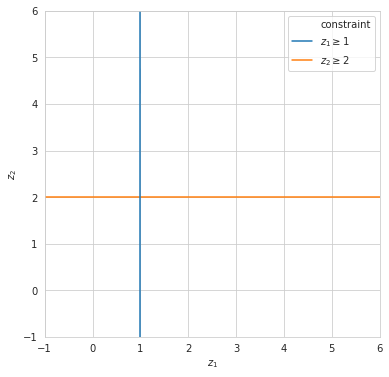

In [7]:
z1_line = np.linspace(-1, 10, 500)
z2_line = np.linspace(-1, 10, 500)

boundary = [
    pd.DataFrame({
        '$z_1$': np.ones_like(z2_line)*1,
        '$z_2$': z2_line,
        'constraint': '$z_1\geq 1$'
    }),
    pd.DataFrame({
        '$z_1$': z1_line,
        '$z_2$': np.ones_like(z1_line)*2,
        'constraint': '$z_2\geq 2$'
    }),
]
fig, ax = plt.subplots(figsize=(6, 6))
sns.lineplot(x='$z_1$', y='$z_2$', hue='constraint', data=pd.concat(boundary), ax=ax).axvline(1)
plt.xlim(-1, 6)
plt.ylim(-1, 6)
plt.show()

<!-- BEGIN QUESTION -->

Sometimes, things just do not work as expected. 

In the toy example code, 
```
sns.lineplot(x='$z_1$', y='$z_2$', hue='constraint', data=pd.concat(boundary), ax=ax).axvline(1)
```
what seems strange about the plotting command? Why was the strange code necessary?

<!--
BEGIN QUESTION
name: q1c1
manual: true
points: 4
-->

The plotting command seems strange because the .axvline(1), from the matplotlib package, is needed in addition to the .lineplot(), from the seaborn  package, in order to form the desired plot. This code combination is necessary because it allows $z_1 \geq 1$ constraint to be plotted since .lineplot() is unable to plot the blue vertical contraint line otherwise.

<!-- END QUESTION -->



#### Example: Resource Constraint Boundary  <a class="tocSkip">

Now, create a data frame for the non-negativity constraint $x_2\geq 0$ as follows:

In [8]:
pd.DataFrame({'$x_1$':x1_line,               ## x_1 can take on any value
              '$x_2$':x1_line * 0.0,         ## x_2 = 0
              'constraint':'$x_2 \geq 0$'}), ## constraint equation for labeling

(         $x_1$  $x_2$    constraint
 0    -1.000000   -0.0  $x_2 \geq 0$
 1    -0.977956   -0.0  $x_2 \geq 0$
 2    -0.955912   -0.0  $x_2 \geq 0$
 3    -0.933868   -0.0  $x_2 \geq 0$
 4    -0.911824   -0.0  $x_2 \geq 0$
 ..         ...    ...           ...
 495   9.911824    0.0  $x_2 \geq 0$
 496   9.933868    0.0  $x_2 \geq 0$
 497   9.955912    0.0  $x_2 \geq 0$
 498   9.977956    0.0  $x_2 \geq 0$
 499  10.000000    0.0  $x_2 \geq 0$
 
 [500 rows x 3 columns],)

Create a list named `boundary` containing four data frames (each corresponding to a constraint). Concatenate data frames in `boundary` to one data frame named `hull`.

<!--
BEGIN QUESTION
name: q1c2
manual: false
points: 6
-->

In [ ]:
boundary = [
    pd.DataFrame({'$x_1$': 6 - (x2_line * 7/5),
                  '$x_2$': x2_line,
                  'constraint':'$5x_1 + 7x_2 \leq 30$'}),
    pd.DataFrame({'$x_1$':  3 - (x2_line * 0.5),
                  '$x_2$': x2_line,
                  'constraint':'$4x_1 + 2x_2 \leq 12$'}),
    pd.DataFrame({'$x_1$': x2_line * 0.0, 
                  '$x_2$': x2_line,
                  'constraint':'$x_1\geq 0$'}),
    pd.DataFrame({'$x_1$':x1_line,
                  '$x_2$':x1_line * 0.0,
                  'constraint':'$x_2\geq 0$'})
]
hull = pd.concat(boundary)

In [14]:
grader.check("q1c2")

q1c2 passed!

### Question 1.d: Interior of Feasible Region

Previous question prepared constraint boundaries, $Ax = b$. In this question, we calculate the interior of the feasible region, which will be shaded in the visualization. First, create a 2-d array of $x_1$ and $x_2$ values. If a point $(x_1, x_2)$ satisfies _every_ constraint, the point will be colored grey.

For example, in order to shade $\{x_1: x_1\geq 1\}\cap\{x_2: x_2\geq 2\}$, we can use the `imshow` method. 

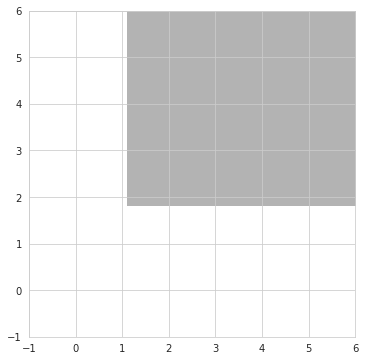

In [41]:
z1_line = np.linspace(-1, 6, 10)
z2_line = np.linspace(-1, 6, 10)
z1_grid, z2_grid = np.meshgrid(z1_line, z2_line)

fig, az = plt.subplots(figsize=(6, 6))
az.imshow(
    ((z1_grid >= 1) & (z2_grid >= 2)).astype(int),
    origin='lower',
    extent=(z1_grid.min(), z1_grid.max(), z2_grid.min(), z2_grid.max()),
    cmap="Greys", alpha=0.3, aspect='equal' 
)
plt.xlim(-1, 6)
plt.ylim(-1, 6)
plt.show()

<!-- BEGIN QUESTION -->

By dissecting the command below and reading the documentation, report what each of the following lines does:

* `((y1_grid >= 1) & (y2_grid >= 2)).astype(int)` (What is the output of running this command?)  
* `origin='lower'`  
* `extent=(y1_grid.min(), y1_grid.max(), y2_grid.min(), y2_grid.max())`  
* `cmap='Greys'`  
* `alpha=0.3`  
* `aspect='equal'`  

<!--
BEGIN QUESTION
name: q1d1
manual: true
points: 6
-->

    - The command ((y1_grid >= 1) & (y2_grid >= 2)).astype(int) goes through the different combinations of y1_grid & y2_grid. The cobimations are then tested with 2 boolean expressions. If the result is True, the statement is coded and displayed as a 1. If the result is False, the statement is coded and displayed as a 0.

    - The command origin='lower' is a parameter within the .imshow() function in the Matplotlib libary. This command places the [0, 0] index of the array in the lower left corner of the axes.

    - The command extent=(y1_grid.min(),y1_grid.max(),y2_grid.min(), y2_grid.max()) is a parameter within the .imshow() function in the Matplotlib libary. This command defines the bounding box in data coordinates that are given by the tuple which contains 4 elements. The 4 different elements are the minimum and maximum values of the y1_grid along with the minimum and maximum values of the y2_grid.

    - The command cmap='Greys' is a parameter within the .imshow() function in Matplotlib. This command gives the shaded region its color of grey by using a pre-defined color name.

    - The command alpha=0.3 is a parameter within the .imshow() function in Matplotlib. This command defines how light or dark the color is defined in the cmap parameter for the entire shaded region. The lower the alpha, the lighter the shade. The higher the alpha, the darker the shade

    - The command aspect='equal' is a parameter used to control the aspect ratio of the axes, which can be chosen from registered keywords of either ‘equal’ or ‘auto’. In this case, ‘equal’ is used to ensure an aspect ratio of 1 and that the pixels of the image will be square.


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### Question 1.e: Visualizing the Feasible Region

Finally, create a figure that shows constraint boundaries and the interior region shaded with a light grey color.

Your output will look like this:  
![hull](images/feasible.png)

<!--
BEGIN QUESTION
name: q1e1
manual: true
points: 8
-->

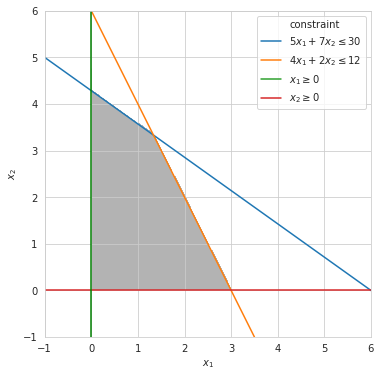

In [43]:
fig, ax = plt.subplots(figsize=(6, 6))
x1_grid, x2_grid = np.meshgrid(x1_line, x2_line)

ax.imshow(
 ((5*x1_grid + 7*x2_grid <= 30) & (4*x1_grid + 2*x2_grid <= 12) & 
 (x1_grid >= 0) & (x2_grid >= 0)).astype(int),
 origin='lower',
 extent=(x1_grid.min(), x1_grid.max(), x2_grid.min(), x2_grid.max()),
 cmap="Greys", alpha = 0.3, aspect='equal')


# ax = sns.lineplot(???).axvline(???)
ax = sns.lineplot(x='$x_1$', y='$x_2$', hue='constraint', 
     data=pd.concat(boundary), ax=ax).axvline(0, color='green')

plt.xlim(-1, 6) 
plt.ylim(-1, 6) 
plt.show()

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

In the context of linear programming, $Ax\leq b$ is called the _feasible region_ (including the appropriate sections of the boundaries). Denote the (shaded) feasible region as set $C$. Points $(x_1,x_2)\in C$ satisfy all of the constraints.

Describe in plain words the feasible region in the context of hot sauce manufacturing. Specifically, which constraint is violated (if any) by a point at:

* $(x_1,x_2) = (4, 1)$
* $(x_1,x_2) = (0, 5)$  
* $(x_1,x_2) = (3, 4)$  

<!--
BEGIN QUESTION
name: q1e2
manual: true
points: 6
-->

In our scenario, the feasible region would be the desired area of producing both hot sauces given the resource constraints. 
Let x1 be vinegar and x2 be pepper.

For (x1,x2) = (4,1), the constraint that is violated is the production of vinegar as it would require using more than the total supply of vinegar.
For (x1, x2) = (0, 5), the constraint that is violated is the production of pepper as it would require using more than the total supply of pepper.
For (x1,x2) = (3,4), the constraints that are violated is the production of vinegar and pepper as it would require using more than the total supply of both vinegar and pepper.

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

## Question 2: Objective Function

### Question 2.a: Defining Objective Function

Suppose the hot sauces are sold at the same price: \\$5 per liter. 

What is the equation $f(x)$ for the total revenue as a function of $x_1$ and $x_2$? 

The function $f(x)$ is called the objective function.

<!--
BEGIN QUESTION
name: q2a1
manual: true
points: 4
-->

f(x) = $5x_1 + 5x_2$

<!-- END QUESTION -->

Objective function $f(x)$ is a linear function in $x$. Therefore, $f(x)$ is a 2-dimesional hyperplane. Note that each value of $f(x)$ defines a line in $(x_1, x_2)$ plane.

For example, $f(x)= 0 = c_1x_1 + c_2x_2$ defines a line. A subspace of equal function value is sometimes referred to as a _level set_ or a _contour line_ when visualized.

First, create a numpy array of prices `c` for the two hot sauces, $x_1$ and $x_2$. Then, create a list `f_vals` containing four data frames of contour lines, $f(x) \in \{0, 10, 20, 30\}$. by creating one data frame for each contour line. 

<!--
BEGIN QUESTION
name: q2a2
manual: false
points: 4
-->

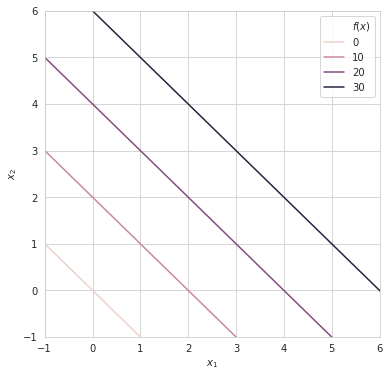

In [52]:
c = np.array([5,5])

fig, ax = plt.subplots(figsize=(6, 6))
contours = [
    pd.DataFrame({
        '$x_1$': x1_line,
        '$x_2$': ( 0 - c[0]*x1_line)/c[1],
        '$f(x)$': 0
    }),
    pd.DataFrame({
        '$x_1$': x1_line,
        '$x_2$': (10 - c[0]*x1_line)/c[1], 
        '$f(x)$': 10
    }), 
    pd.DataFrame({
        '$x_1$': x1_line,
        '$x_2$': (20 - c[0]*x1_line)/c[1], 
        '$f(x)$': 20
    }), 
    pd.DataFrame({
        '$x_1$': x1_line,
        '$x_2$': (30 - c[0]*x1_line)/c[1], 
        '$f(x)$': 30
    }) 
]
f_vals = pd.concat(contours)

# ax = sns.lineplot(???)
ax = sns.lineplot(x='$x_1$', y='$x_2$', hue='$f(x)$', data=f_vals, ax=ax)

plt.xlim(-1, 6)
plt.ylim(-1, 6)
plt.show()

In [53]:
grader.check("q2a2")

q2a2 passed!

<!-- BEGIN QUESTION -->

### Question 2.b: Direction of Steepest Increase

Since we want to maximize revenue, we want to increase our objective function as much as possible. Analogous to the minimization example given in a previous lecture, we can repeatedly move in the direction of function increase. In order to determine such direction, compute the gradient of $f(x)$ at $x=(0,0)^T$:
$$\nabla_x f(x) = \begin{pmatrix}\frac{\partial f(x)}{\partial x_1}\\\frac{\partial f(x)}{\partial x_2}\end{pmatrix} $$

<!--
BEGIN QUESTION
name: q2b
manual: true
points: 4
-->

$$\nabla_x f(x) = \begin{pmatrix}\frac{\partial (5x_1 +5x_2)}{\partial x_1}\\\frac{\partial (5x_1 +5x_2)}{\partial x_2}\end{pmatrix} $$



$$\nabla_x f(x) = \begin{pmatrix}{5}{}\\{5}{}\end{pmatrix} $$

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

## Question 3: Putting Pieces Together

### Question 3.a: Standard Form of a Linear Programming Problem

Write down the so-called the _standard form_ of a linear programming problem:
$$\begin{aligned}
\max_x & f(x)\\
\text{subject to } & Ax\leq b
\end{aligned}$$

Specifically, write the obejective as an inner product of two vectors: $f(x) = c^T x$, and write the constraint as a vector inequality involving a matrix-vector prduct: $Ax\leq b$, where $A$ is a 4-by-2 matrix.

<!--
BEGIN QUESTION
name: q3a
manual: true
points: 4
-->

max $c^Tx$

subject to $Ax \leq b$ 

<!-- END QUESTION -->

### Question 3.b: Computing the Numerical Solution

Therefore, _maximizing_ the revenue is a search over the feasible region for the best point $x^*=(x_1^*, x_2^*)$ that gives the largest revenue. On the otherhand, any _infeasible_ point _not_ in the feasible region cannot be a solution to the constrained optimization problem.

Notationally, the following expression means the same thing:
$$x^* = \arg\max_{\{x: Ax\leq b\}} f(x)$$

Using [CVXPY](https://www.cvxpy.org/), solve for the resource allocation problem with constraints.

<!--
BEGIN QUESTION
name: q3b
manual: false
points: 4
-->

In [48]:
# define variables
x = cp.Variable(2)

# define the linear program
problem = cp.Problem(
    cp.Maximize(c.T@x),
    [A1@x <= b1]
)

fstar1 = problem.solve()                                                 # maximum attained function value
xstar1 = pd.DataFrame(x.value.reshape(1, 2), columns=['$x_1$', '$x_2$']) # maximizer x for f

In [49]:
grader.check("q3b")

q3b passed!

<!-- BEGIN QUESTION -->

### Question 3.c: Plotting the optimal solution

<!--
BEGIN QUESTION
name: q3c
manual: true
points: 4
-->

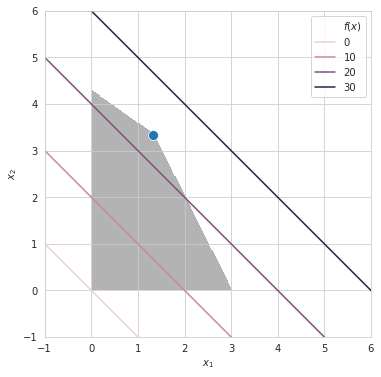

In [54]:
fig, ax = plt.subplots(figsize=(6, 6))
x1_grid, x2_grid = np.meshgrid(x1_line, x2_line)
ax.imshow(
    (
        (A1[0,0]*x1_grid + A1[0,1]*x2_grid <= b1[0]) & # Pepper constraints
        (A1[1,0]*x1_grid + A1[1,1]*x2_grid <= b1[1]) & # Vinegar constraints
        (A1[2,0]*x1_grid + A1[2,1]*x2_grid <= b1[2]) & 
        (A1[3,0]*x1_grid + A1[3,1]*x2_grid <= b1[3])   # non-negativity constraints 
    ),
    origin='lower',
    extent=(x1_grid.min(), x1_grid.max(), x2_grid.min(), x2_grid.max()),
    cmap="Greys", alpha = 0.3, aspect='equal' 
)
sns.scatterplot(x='$x_1$', y='$x_2$', data=xstar1, ax=ax, s=100)
sns.lineplot(x='$x_1$', y='$x_2$', hue='$f(x)$', data=f_vals, ax=ax)
plt.xlim(-1, 6)
plt.ylim(-1, 6)
plt.show()

---

To double-check your work, the cell below will rerun all of the autograder tests.

In [55]:
grader.check_all()

q1b2 passed!

q1c2 passed!

q2a2 passed!

q3b passed!

## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

In [51]:
# Save your notebook first, then run this cell to export your submission.
grader.export()